In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df =pd.read_csv("car data.csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
# unique values

In [7]:
print(df.Seller_Type.unique())

['Dealer' 'Individual']


In [8]:
print(df.Fuel_Type.unique())

['Petrol' 'Diesel' 'CNG']


In [9]:
print(df.Transmission.unique())

['Manual' 'Automatic']


In [10]:
print(df.Owner.unique())

[0 1 3]


In [11]:
# missing values or null values

In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
# details

In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
# dropping column --car name

In [17]:
final_dataset =df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [18]:
final_dataset.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [19]:
# dereive new column or feature from Year column

In [20]:
final_dataset["Current_Year"] = 2021

In [21]:
final_dataset.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021


In [22]:
final_dataset["car_age"] =  final_dataset["Current_Year"] - final_dataset["Year"]

In [23]:
final_dataset.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4


In [24]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [25]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [26]:
final_dataset.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4


In [27]:
# categorical features into numerical features

In [28]:
final_dataset = pd.get_dummies(final_dataset, drop_first =True)

In [29]:
final_dataset.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1


In [30]:
# check correlation


In [31]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [32]:
import seaborn as sns

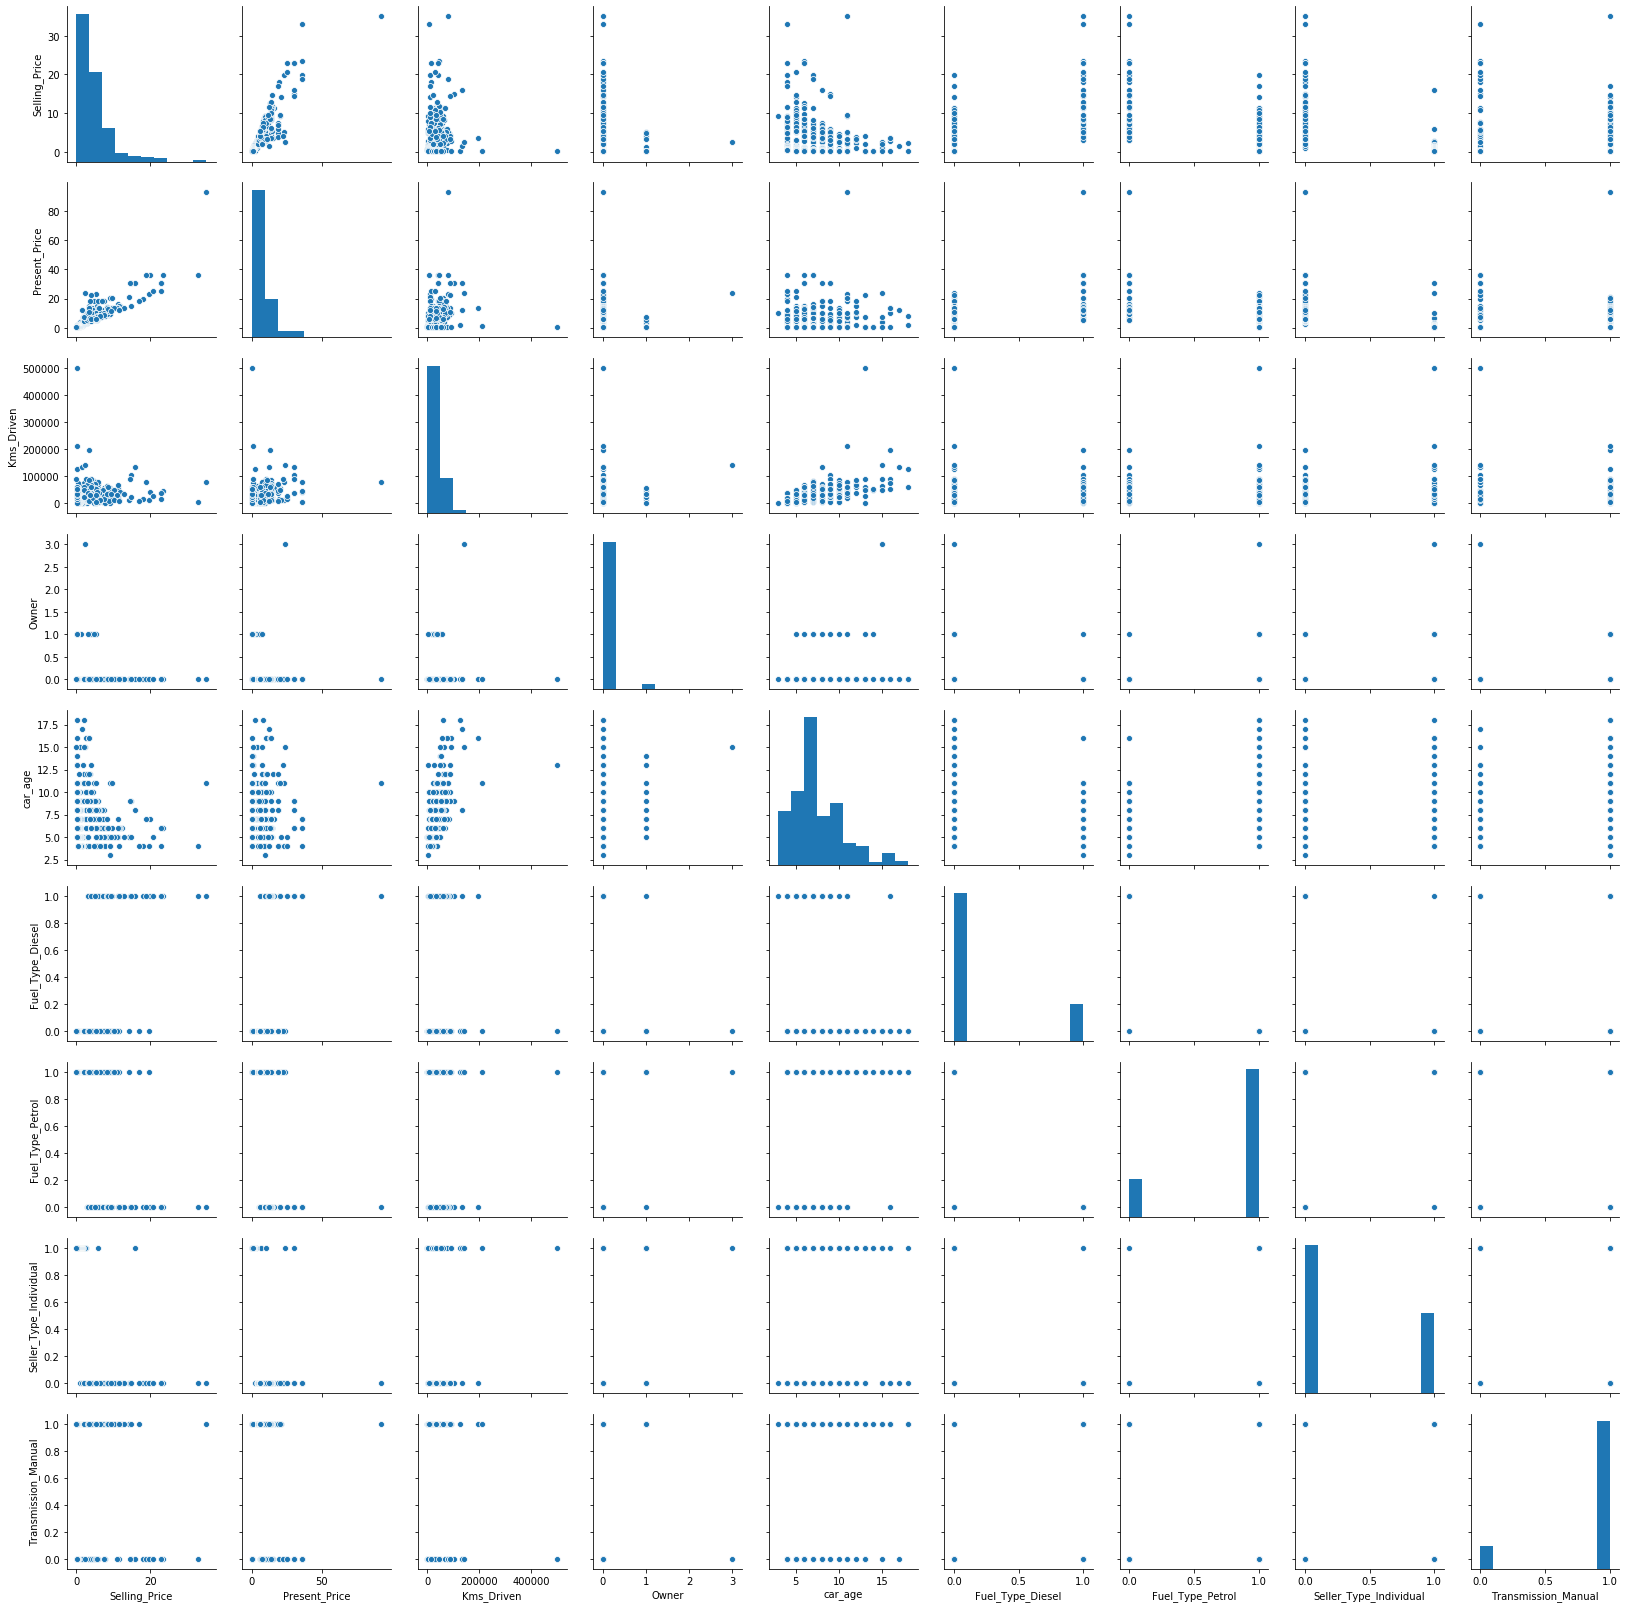

In [33]:
sns.pairplot(final_dataset)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

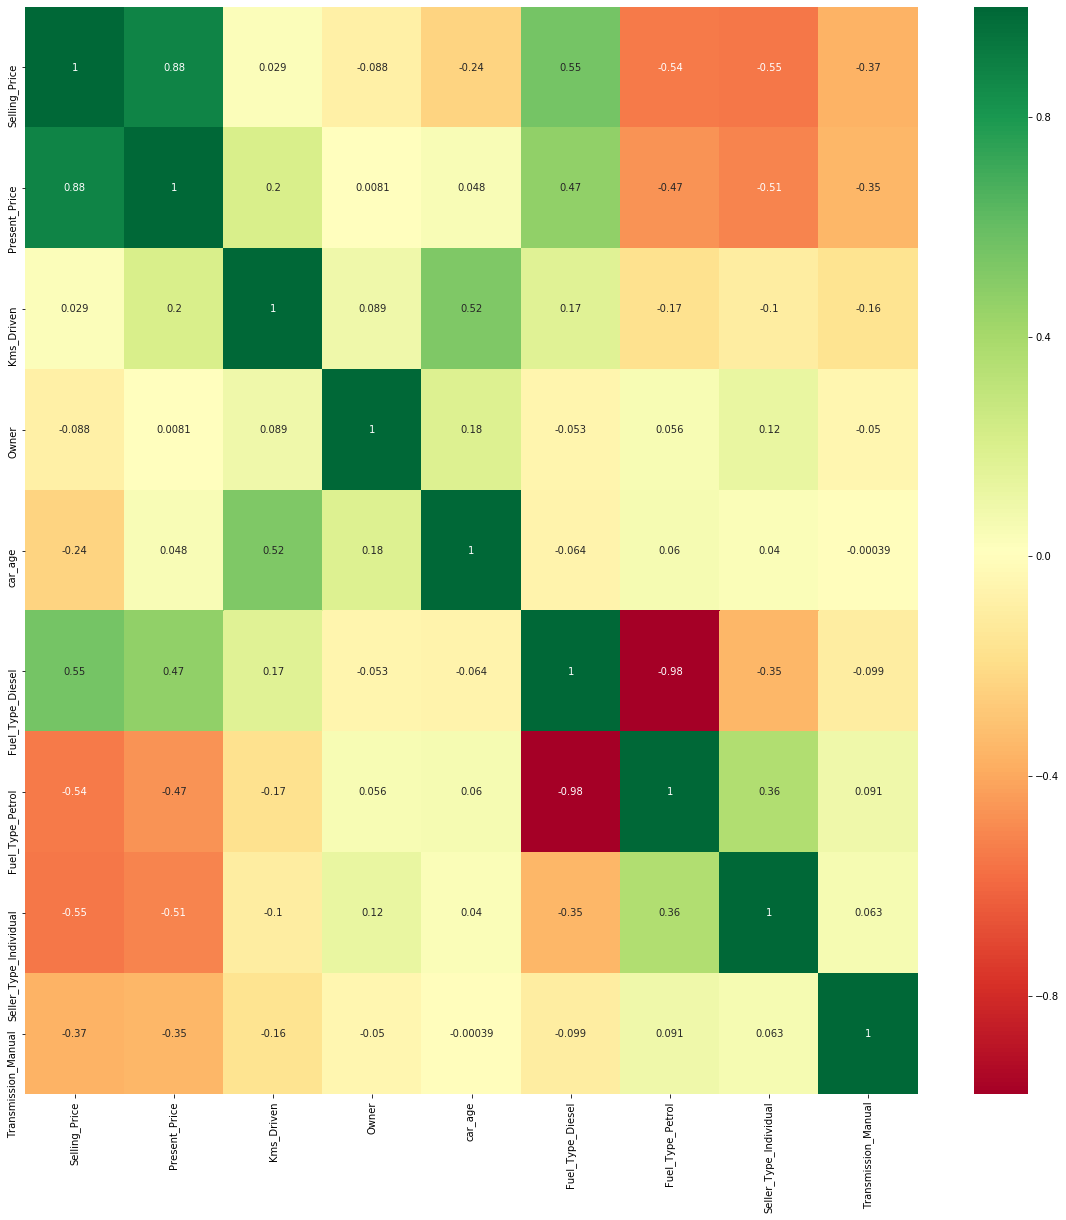

In [35]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True ,cmap = 'RdYlGn')

In [36]:
final_dataset.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1


In [37]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'car_age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [38]:
# independent and dependant features
X = final_dataset[['Present_Price', 'Kms_Driven', 'Owner', 'car_age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]
y = final_dataset['Selling_Price']

In [39]:
X.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [40]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [41]:
# optional
X1 =final_dataset.iloc[:,1:]
y1= final_dataset.iloc[:,0]

In [42]:
X1.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [43]:
y1.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [44]:
list(X.columns)

['Present_Price',
 'Kms_Driven',
 'Owner',
 'car_age',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [45]:
X_cols = list(X.columns)

In [46]:
X_cols

['Present_Price',
 'Kms_Driven',
 'Owner',
 'car_age',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [47]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [48]:
print(model.feature_importances_)

[4.19543176e-01 4.09822320e-02 7.16863578e-04 7.80303991e-02
 2.39356886e-01 1.96845109e-04 8.44910526e-02 1.36682546e-01]


In [49]:
feature_imp = list(model.feature_importances_)

In [50]:
feature_imp

[0.41954317562934024,
 0.040982232018274264,
 0.0007168635777509767,
 0.07803039909822014,
 0.23935688636644842,
 0.00019684510908455033,
 0.08449105261652261,
 0.13668254558435883]

In [51]:
list(model.feature_importances_)

[0.41954317562934024,
 0.040982232018274264,
 0.0007168635777509767,
 0.07803039909822014,
 0.23935688636644842,
 0.00019684510908455033,
 0.08449105261652261,
 0.13668254558435883]

In [52]:
feature_df = pd.DataFrame(data = list(feature_imp) ,index = X_cols , columns = ['Feature_importance'])

In [53]:
feature_df

,Feature_importance
Present_Price,0.419543
Kms_Driven,0.040982
Owner,0.000717
car_age,0.078030
Fuel_Type_Diesel,0.239357
Fuel_Type_Petrol,0.000197
Seller_Type_Individual,0.084491
Transmission_Manual,0.136683


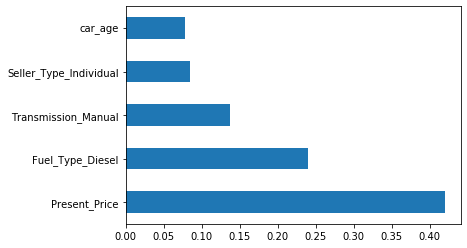

In [54]:
# plot gra[h of feature importance
feat_importances = pd.Series(model.feature_importances_, index = X.columns )
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [55]:
# train test split
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.2)

In [56]:
X_train.shape

(240, 8)

In [57]:
X_test.shape

(61, 8)

In [58]:
X.shape

(301, 8)

In [59]:
# random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [61]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace( start = 100 , stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:

#Randomized Search CV

In [64]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [65]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [67]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [68]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [69]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [70]:
rf_random.best_score_

-3.8522983502553187

In [71]:
predictions=rf_random.predict(X_test)

In [72]:
predictions

array([ 0.84475701,  5.70116848,  0.3222176 ,  0.33521747,  0.25786469,
        6.14089977,  5.11929098,  1.93302498,  5.42962512,  0.45130448,
        1.13376499,  0.63991842,  0.50741289, 10.14064503,  7.88761408,
        0.41796512,  2.79222138,  9.11806454,  2.85439397,  5.07982812,
        4.85289648,  0.40828505,  0.49180793,  3.29230959,  9.25592573,
        6.68518225,  9.39122516,  3.69882394,  4.28637539,  8.86792142,
       10.15924836,  5.96280767,  4.12219515,  2.66822211,  7.39836222,
        8.90063113, 10.46534631,  2.8144717 ,  3.69491875,  2.94066832,
        3.0701872 ,  0.25391536,  0.64572792,  0.23927238, 19.76476479,
        3.3361173 ,  7.48860507,  8.78121384,  4.45802845,  3.96864136,
        8.74619971, 18.40324358,  0.66485406,  0.66631247,  6.64199349,
        2.66474467,  2.79930048,  4.94225794,  8.07519032,  6.51859878,
        2.80306579])

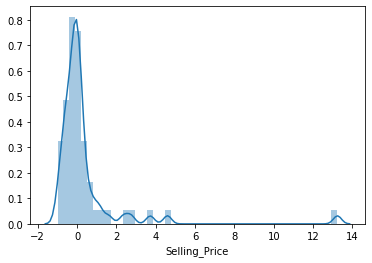

In [73]:
sns.distplot(y_test-predictions)

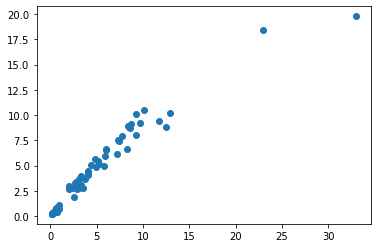

In [74]:
plt.scatter(y_test,predictions)

In [75]:
from sklearn import metrics

In [76]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7901358436196179
MSE: 3.901208745361047
RMSE: 1.975147778107007


In [77]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
file.close()

In [78]:
"""
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()
"""

'\n### Create a Pickle file using serialization \nimport pickle\npickle_out = open("classifier.pkl","wb")\npickle.dump(classifier, pickle_out)\npickle_out.close()\n'

In [79]:
from platform import python_version

print(python_version())

3.7.3


In [80]:
import sys
print(sys.executable)

C:\Users\DELL\Anaconda3\python.exe


In [81]:
!conda info


     active environment : carprediction
    active env location : C:\Users\DELL\Anaconda3\envs\carprediction
            shell level : 2
       user config file : C:\Users\DELL\.condarc
 populated config files : C:\Users\DELL\.condarc
          conda version : 4.10.3
    conda-build version : 3.18.8
         python version : 3.7.3.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\DELL\Anaconda3  (writable)
      conda av data dir : C:\Users\DELL\Anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          pac

In [82]:
import pickle
print(pickle.__doc__)

Create portable serialized representations of Python objects.

See module copyreg for a mechanism for registering custom picklers.
See module pickletools source for extensive comments.

Classes:

    Pickler
    Unpickler

Functions:

    dump(object, file)
    dumps(object) -> string
    load(file) -> object
    loads(string) -> object

Misc variables:

    __version__
    format_version
    compatible_formats


